# Nova Real Estate Price Predictor


In [1]:
import pandas as pd


In [2]:
df_housing=pd.read_csv("data.csv")

In [3]:
df_housing

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [4]:
df_housing.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
df_housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  410 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
df_housing.info() #missing data ka pata chal jata h 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  410 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [7]:
df_housing['X2 house age'].value_counts() # har house age ke counts bata dega


0.0     17
13.6     7
13.3     6
16.2     6
16.4     6
        ..
30.2     1
4.3      1
24.0     1
8.4      1
18.8     1
Name: X2 house age, Length: 236, dtype: int64

In [8]:
df_housing.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,410.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1085.238187,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1265.168569,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [9]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt


array([[<Axes: title={'center': 'No'}>,
        <Axes: title={'center': 'X1 transaction date'}>,
        <Axes: title={'center': 'X2 house age'}>],
       [<Axes: title={'center': 'X3 distance to the nearest MRT station'}>,
        <Axes: title={'center': 'X4 number of convenience stores'}>,
        <Axes: title={'center': 'X5 latitude'}>],
       [<Axes: title={'center': 'X6 longitude'}>,
        <Axes: title={'center': 'Y house price of unit area'}>, <Axes: >]],
      dtype=object)

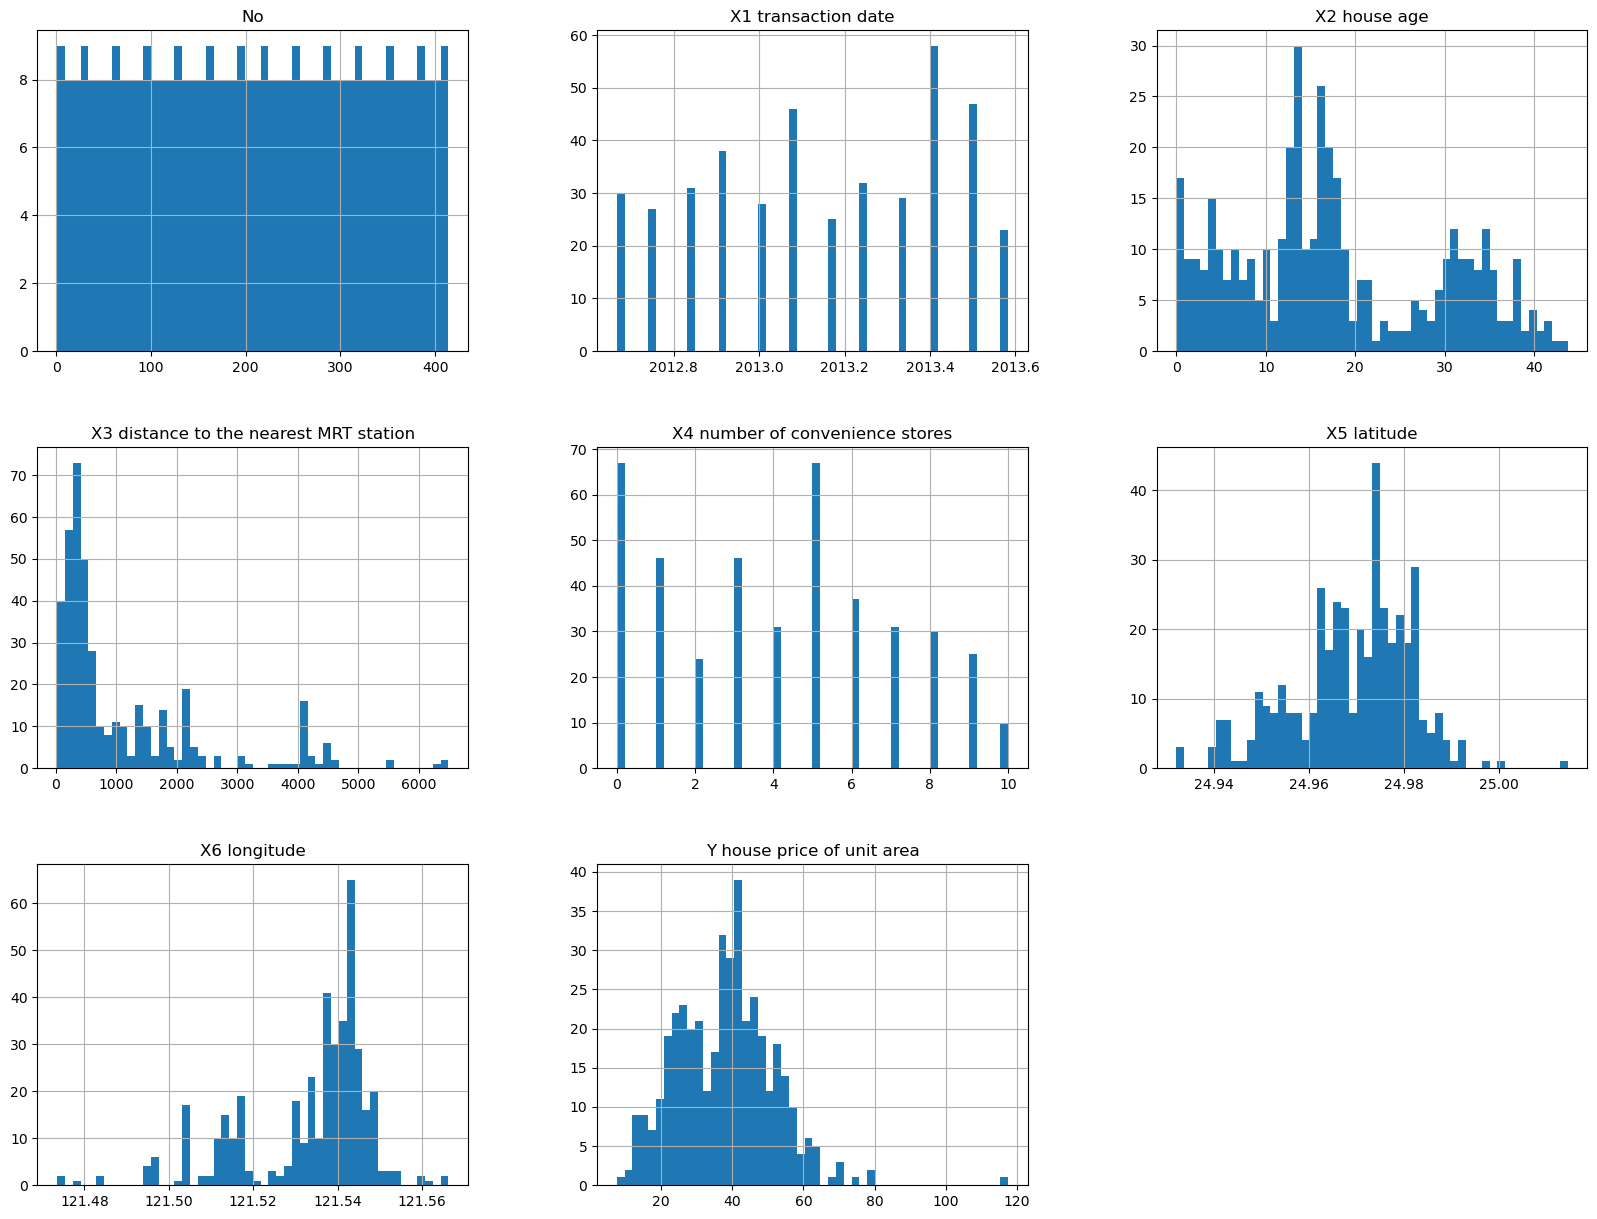

In [11]:
df_housing.hist(bins=50,figsize=(20,15))  # very important

# Train-test Splitting


In [12]:
import numpy as np
#for learning purpose
 
def split_train_test(data,test_ratio):
    np.random.seed(42)# parampara h seed 42 lene ki
    shuffled=np.random.permutation(len(data))
    #shuffled permuted value obtain karta h 
    #long run mein shuffle kar karke python poora dataset dekh sakta h jo ki galat ho jaega. Overfit karne lagega dataset par
    #galat baat h
    test_set_size=int(len(data)*test_ratio) # generally 80:20 ratio rehta h 
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]  # very important function 


In [13]:
train_set,test_set=split_train_test(df_housing,0.2)

In [14]:
print(f"Rows in train set:{len(train_set)}\nRows in test set: {len(test_set)} ")

Rows in train set:332
Rows in test set: 82 


In [15]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(df_housing, test_size=0.2,random_state=42)
print(f"Rows in train set:{len(train_set)}\nRows in test set: {len(test_set)} ")



Rows in train set:331
Rows in test set: 83 


In [16]:
#stratified sampling
#ham chahte h ki hamara jo train set aur test set h usmein barabar values h for some characteristic which is very important


from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(df_housing,df_housing['X4 number of convenience stores']):
    strat_train_set=df_housing.loc[train_index]
    strat_test_set=df_housing.loc[test_index]
    



In [52]:
strat_test_set.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,83.000000,83.000000,83.000000,81.000000,83.000000,83.000000,83.000000,83.000000
mean,200.048193,2013.173711,16.490361,1113.863979,4.060241,24.968154,121.532645,39.402410
std,117.126563,0.287238,10.947598,1327.753095,2.968737,0.012779,0.015735,15.933398
min,2.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,11.200000
25%,107.500000,2012.917000,7.300000,276.449000,1.000000,24.962990,121.521220,29.100000
50%,192.000000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538890,39.000000
75%,308.500000,2013.417000,22.250000,1497.713000,6.000000,24.977255,121.543150,47.200000
max,397.000000,2013.583000,41.300000,6488.021000,10.000000,24.990060,121.559640,117.500000


In [18]:
strat_test_set.value_counts()

No   X1 transaction date  X2 house age  X3 distance to the nearest MRT station  X4 number of convenience stores  X5 latitude  X6 longitude  Y house price of unit area
2    2012.917             19.5          306.59470                               9                                24.98034     121.53951     42.2                          1
214  2013.083             6.2           90.45606                                9                                24.97433     121.54310     58.0                          1
307  2013.500             14.4          169.98030                               1                                24.97369     121.52979     50.2                          1
287  2012.917             5.9           90.45606                                9                                24.97433     121.54310     56.3                          1
285  2012.917             15.0          383.28050                               7                                24.96735     121.54464     34.4 

In [19]:
strat_test_set['X4 number of convenience stores'].value_counts()

5     14
0     14
3      9
1      9
6      7
4      6
7      6
8      6
9      5
2      5
10     2
Name: X4 number of convenience stores, dtype: int64

In [20]:
strat_train_set['X4 number of convenience stores'].value_counts()

0     53
5     53
3     37
1     37
6     30
7     25
4     25
8     24
9     20
2     19
10     8
Name: X4 number of convenience stores, dtype: int64

In [21]:
# notice that the ratio of vakues for train and test are same. this is stratified sampling. Eg X4=0 and X4=5 ke values equal
# h donon train aur test data sets mein


# Looking for Correlations


In [22]:
corr_matrix=df_housing.corr()

In [23]:
corr_matrix['X2 house age'].sort_values(ascending=False) # 1 means strong positive corelation , -1 means strong negative 
#corelation. notice that jitna purana ghar utna daam girega


X2 house age                              1.000000
X5 latitude                               0.054420
X4 number of convenience stores           0.049593
X3 distance to the nearest MRT station    0.026435
X1 transaction date                       0.017549
No                                       -0.032808
X6 longitude                             -0.048520
Y house price of unit area               -0.210567
Name: X2 house age, dtype: float64

array([[<Axes: xlabel='X1 transaction date', ylabel='X1 transaction date'>,
        <Axes: xlabel='X2 house age', ylabel='X1 transaction date'>,
        <Axes: xlabel='X3 distance to the nearest MRT station', ylabel='X1 transaction date'>,
        <Axes: xlabel='X4 number of convenience stores', ylabel='X1 transaction date'>,
        <Axes: xlabel='Y house price of unit area', ylabel='X1 transaction date'>],
       [<Axes: xlabel='X1 transaction date', ylabel='X2 house age'>,
        <Axes: xlabel='X2 house age', ylabel='X2 house age'>,
        <Axes: xlabel='X3 distance to the nearest MRT station', ylabel='X2 house age'>,
        <Axes: xlabel='X4 number of convenience stores', ylabel='X2 house age'>,
        <Axes: xlabel='Y house price of unit area', ylabel='X2 house age'>],
       [<Axes: xlabel='X1 transaction date', ylabel='X3 distance to the nearest MRT station'>,
        <Axes: xlabel='X2 house age', ylabel='X3 distance to the nearest MRT station'>,
        <Axes: xlabel='X3 di

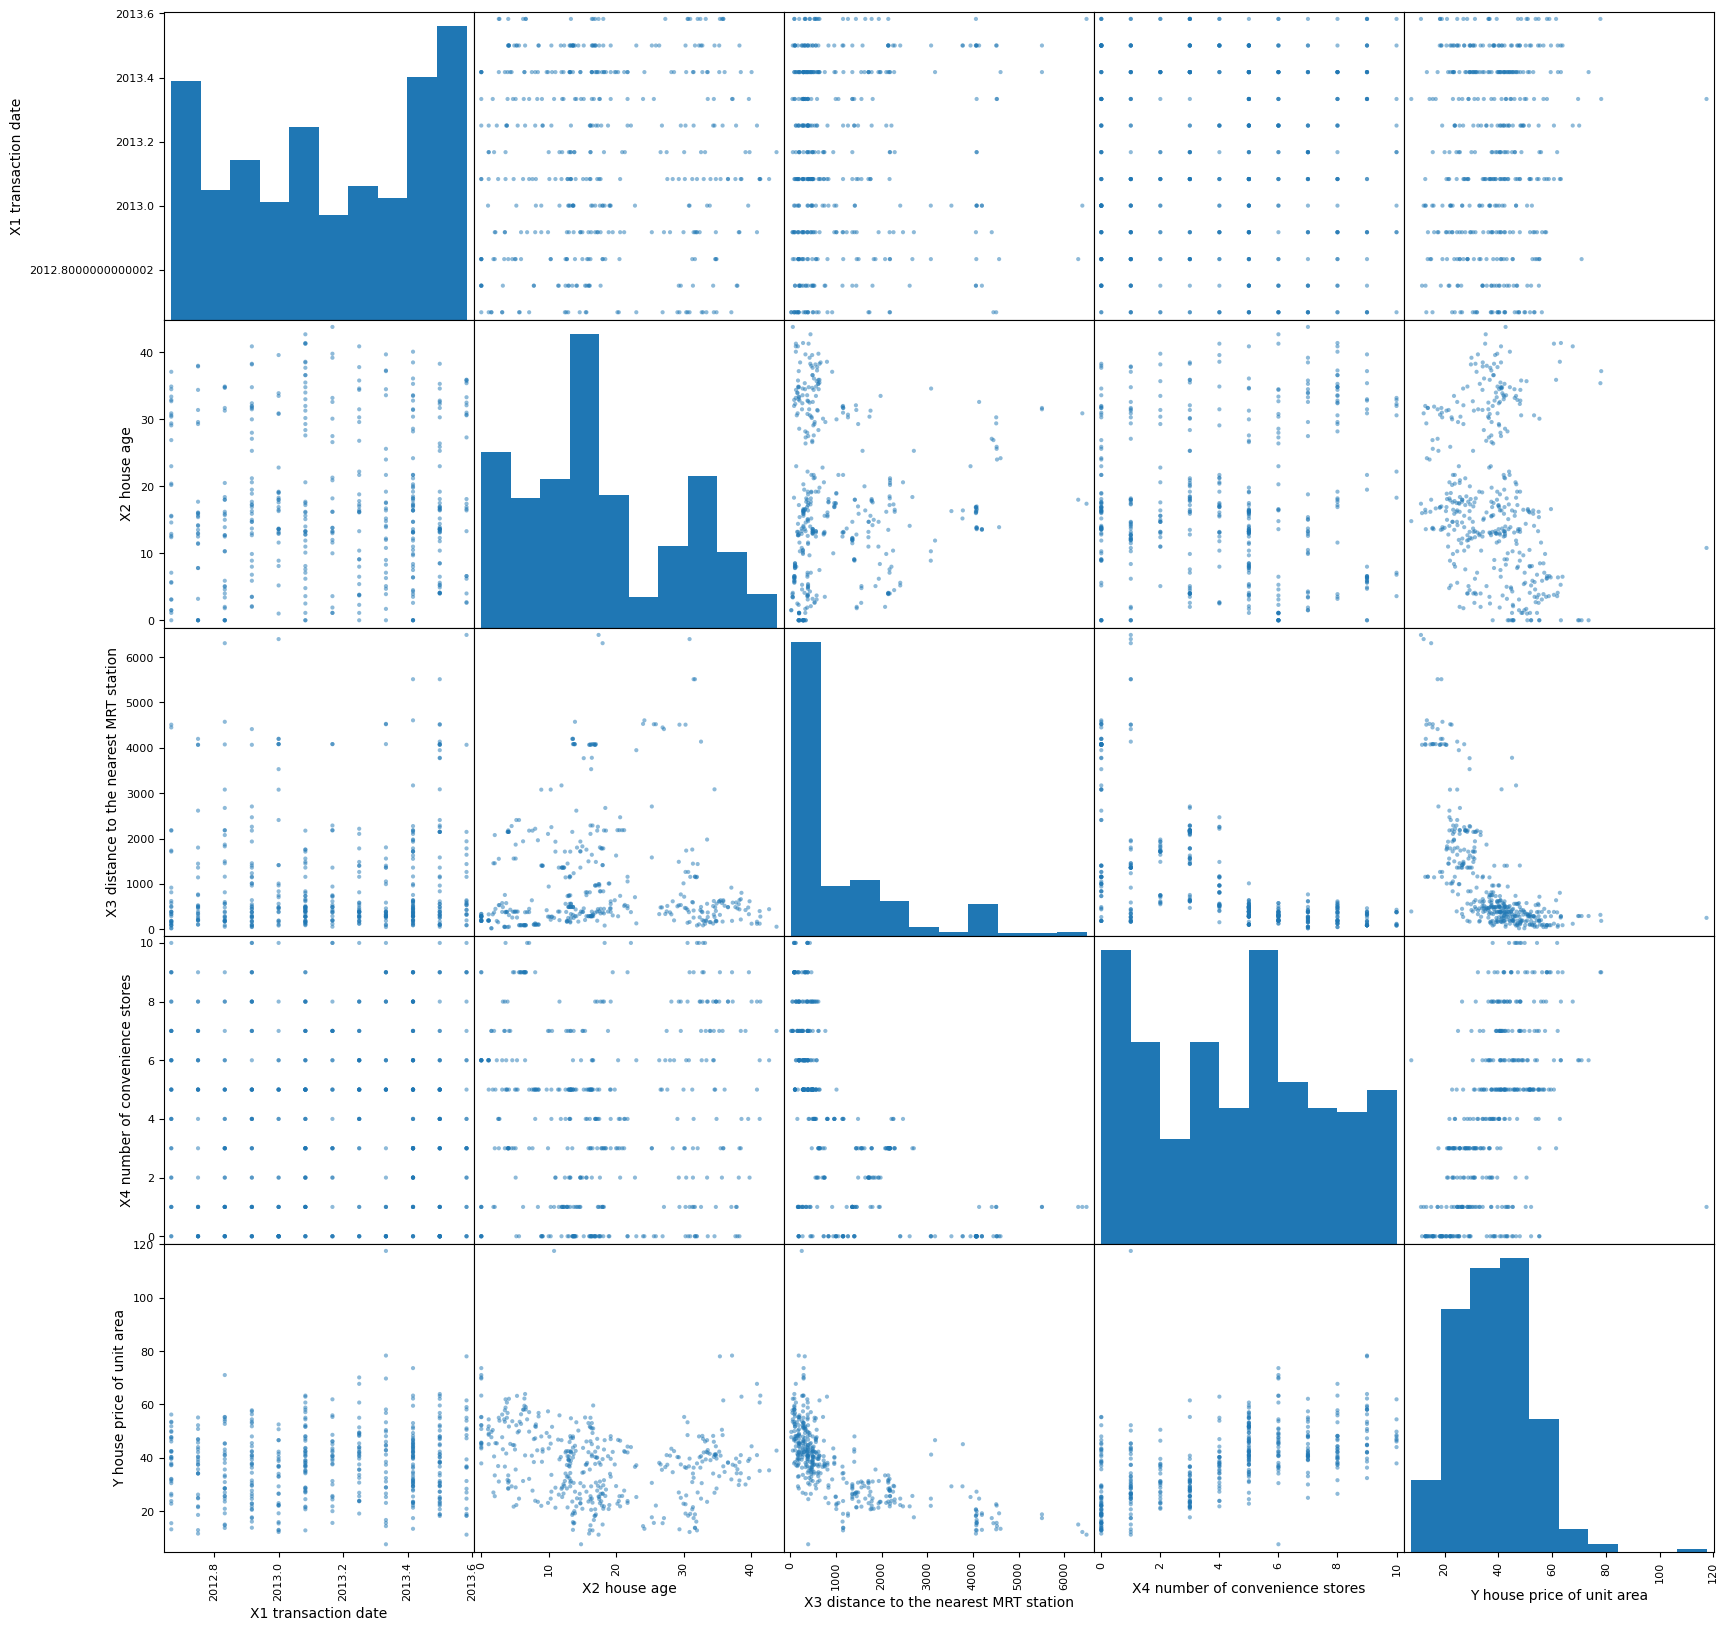

In [24]:
from pandas.plotting import scatter_matrix
attributes=["X1 transaction date","X2 house age","X3 distance to the nearest MRT station","X4 number of convenience stores","Y house price of unit area"]
scatter_matrix(df_housing[attributes],figsize=(20,20))


<Axes: xlabel='X2 house age', ylabel='Y house price of unit area'>

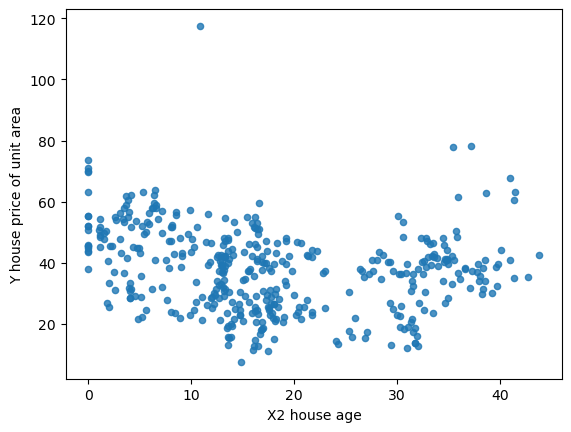

In [25]:
df_housing.plot(kind="scatter",y="Y house price of unit area",x="X2 house age",alpha=0.8)

## Trying out attribute combinations

In [26]:
df_housing.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [27]:
df_housing['Coordinate']=df_housing['X5 latitude']

In [28]:
df_housing.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Coordinate
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,24.98298
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,24.98034
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,24.98746
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,24.98746
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,24.97937


# To take care of missing attributes


In [29]:
#you have three options to take care of missing attributes:
#1. get rid of the missing data points.
#2. get rid of the whole attribute
#3. set the value to some value(0, mean or median)



In [30]:
#1.
a=df_housing.dropna(subset=["X3 distance to the nearest MRT station"]) #option 1
a.shape

(410, 9)

In [31]:
#2. 
a=df_housing.drop("X3 distance to the nearest MRT station",axis=1)

In [32]:
a.head() #note that X3 is gone. also note that the original dataset will remain unchanged

,No,X1 transaction date,X2 house age,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Coordinate
0,1,2012.917,32.0,10,24.98298,121.54024,37.9,24.98298
1,2,2012.917,19.5,9,24.98034,121.53951,42.2,24.98034
2,3,2013.583,13.3,5,24.98746,121.54391,47.3,24.98746
3,4,2013.500,13.3,5,24.98746,121.54391,54.8,24.98746
4,5,2012.833,5.0,5,24.97937,121.54245,43.1,24.97937


In [33]:
#3. putting some value


In [34]:
median=df_housing["X3 distance to the nearest MRT station"].median()

In [35]:
df_housing["X3 distance to the nearest MRT station"].fillna(median)

0        84.87882
1       306.59470
2       561.98450
3       561.98450
4       390.56840
          ...    
409    4082.01500
410      90.45606
411     390.96960
412     104.81010
413      90.45606
Name: X3 distance to the nearest MRT station, Length: 414, dtype: float64

In [36]:
df_housing.shape

(414, 9)

In [37]:
df_housing.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Coordinate
count,414.000000,414.000000,414.000000,410.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1085.238187,4.094203,24.969030,121.533361,37.980193,24.969030
std,119.655756,0.281967,11.392485,1265.168569,2.945562,0.012410,0.015347,13.606488,0.012410
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000,24.932070
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000,24.963000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000,24.971100
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000,24.977455
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000,25.014590


In [38]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(df_housing)

SimpleImputer(strategy='median')

In [39]:
imputer.statistics_

array([ 207.5    , 2013.167  ,   16.1    ,  492.2313 ,    4.     ,
         24.9711 ,  121.53863,   38.45   ,   24.9711 ])

In [40]:
X=imputer.transform(df_housing)

In [41]:
housing_tr=pd.DataFrame(X,columns=df_housing.columns)

In [42]:
housing_tr.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Coordinate
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1079.508651,4.094203,24.969030,121.533361,37.980193,24.969030
std,119.655756,0.281967,11.392485,1260.365742,2.945562,0.012410,0.015347,13.606488,0.012410
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000,24.932070
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000,24.963000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000,24.971100
75%,310.750000,2013.417000,28.150000,1449.113000,6.000000,24.977455,121.543305,46.600000,24.977455
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000,25.014590


## Scikit learn

Primarily three types of objects
1. Estimators - it estimates some parameters . Eg- imputer It has a fit method and transform method.Fit method- Fits the dataset and calculates internal parameters
2. Transformers - transform method takes input and returns output based on the learning fit(). It also has a convenience function based on a fit_transform() which fits and then transforms

3. Predictors - linear Regression model is an example for predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.



In [43]:
df_housing.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Coordinate
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,24.98298
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,24.98034
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,24.98746
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,24.98746
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,24.97937


In [44]:
#making a pipeline


## Feature Scaling

Primarily, two types of feature scaling methods:
1. Min-Max scaling(Normalizing)
 (value-min)/(max-min)
 Sklearn provides a class called MinMaxscaler for this
2. Standardization
(value-mean)/std
Sklearn provides a class called Standard Scaler for this


# creating pipeline

In [45]:
from sklearn.pipeline import Pipeline
#aisa chahenge ki hamare saare features lagbhag lagbhag same range mein lie karenge(in histograms)
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([('imputer',SimpleImputer(strategy="median")),
                      #add----- as many as you want------
                     ('std_scaler',StandardScaler())])


In [49]:
housing_num_tr=my_pipeline.fit_transform(df_housing)


In [48]:
housing_num_tr #converted to a numpy array

array([[-1.72787215, -0.82368321,  1.25562833, ...,  0.44876222,
        -0.00590088,  1.12542986],
       [-1.71950473, -0.82368321,  0.15708622, ...,  0.40113894,
         0.3105072 ,  0.91244418],
       [-1.71113731,  1.54115111, -0.38779067, ...,  0.68818339,
         0.6857819 ,  1.48686011],
       ...,
       [ 1.71113731,  0.35873395,  0.09556786, ...,  0.42397202,
         0.19277396,  0.82289338],
       [ 1.71950473, -0.52896662, -0.84478419, ...,  0.4768143 ,
         1.06841493, -0.18475479],
       [ 1.72787215,  1.24643452, -0.98539758, ...,  0.63534112,
         1.90726426,  0.42757905]])

## selecting a desired model for Nova 

In [50]:
#pat on the back. Machine learning mein kaafi kuch seekh liya


In [51]:
housing_num_tr.shape

(414, 9)